# CPR appropriation

## Pre-requisites

In [18]:
%%capture
!pip install src/gym_cpr_grid
!pip install -r requirements.txt

In [20]:
import numpy as np
import gym

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Random policy

In [2]:
env = gym.make('gym_cpr_grid:CPRGridEnv-v0', n_agents=3, grid_width=5, grid_height=7)

KeyboardInterrupt: 

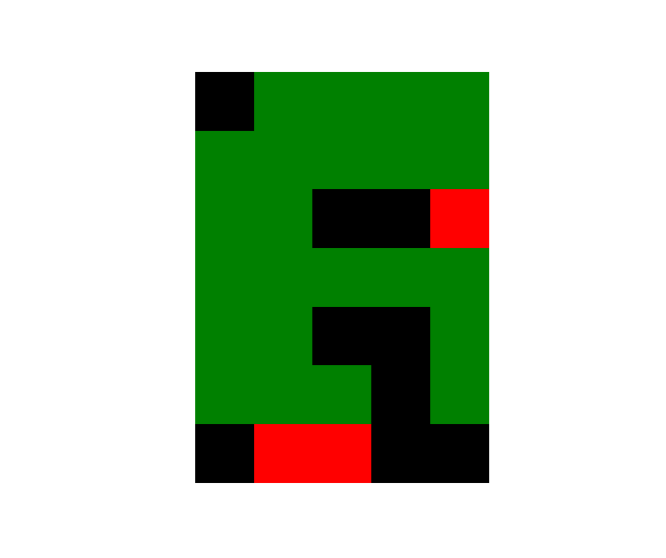

In [15]:
import matplotlib.pyplot as plt
from IPython import display

observations = env.reset()
fig, ax, img = env.plot(env.render('rgb_array'))
for _ in range(env.max_steps):
    display.display(plt.gcf())
    action_dict = {h: env.action_space.sample() for h in range(env.n_agents)}
    observations, rewards, dones, infos = env.step(action_dict)
    display.clear_output(wait=True)
    img.set_data(env.render(mode='rgb_array'))
env.close()

## RLlib baselines

In [21]:
from src import models
from ray.rllib.models import ModelCatalog

ModelCatalog.register_custom_model("fcn", models.FCNetwork)

In [23]:
from ray import tune
from ray.rllib.agents.dqn import DQNTrainer
from ray.rllib.models.torch.fcnet import FullyConnectedNetwork

tune.run(
    DQNTrainer, 
    config={
        "env": "gym_cpr_grid:CPRGridEnv-v0", 
        "env_config": {
            "n_agents": 3,
            "grid_width": 5,
            "grid_height": 7
        }, 
        "num_workers": 1, 
        "framework": "torch",
        "model": {
            "custom_model": "fcn",
            "fcnet_hiddens": [32, 32],
            "fcnet_activation": "relu",
        },
        "exploration_config": {
            "type": "EpsilonGreedy",
            "initial_epsilon": 1.0,
            "final_epsilon": 0.1,
            "epsilon_timesteps": env.max_steps,
        },
    }
)

Trial name,status,loc
DQN_gym_cpr_grid:CPRGridEnv-v0_12977_00000,PENDING,


(pid=54161) 2021-08-17 09:38:12,709	INFO trainer.py:718 -- Current log_level is WARN. For more information, set 'log_level': 'INFO' / 'DEBUG' or use the -v and -vv flags.
(pid=54161) 2021-08-17 09:38:14,223	WARNING util.py:55 -- Install gputil for GPU system monitoring.


Result for DQN_gym_cpr_grid:CPRGridEnv-v0_12977_00000:
  agent_timesteps_total: 1008
  custom_metrics: {}
  date: 2021-08-17_09-38-15
  done: false
  episode_len_mean: .nan
  episode_media: {}
  episode_reward_max: .nan
  episode_reward_mean: .nan
  episode_reward_min: .nan
  episodes_this_iter: 0
  episodes_total: 0
  experiment_id: ee1858f3aa17418d8d7e7ac6d9b5f303
  hostname: wadaboa-work.local
  info:
    last_target_update_ts: 1008
    learner:
      default_policy:
        custom_metrics: {}
        learner_stats:
          allreduce_latency: 0.0
          cur_lr: 0.0005
          grad_gnorm: 1.2916113138198853
          max_q: 0.09693920612335205
          mean_q: 0.04877370595932007
          mean_td_error: 0.8819049596786499
          min_q: 0.006110220216214657
        model: {}
        td_error: "[ 1.0911441   1.1054873   0.99730796 -0.95566654  1.1063724   1.0110275\n\
          \  1.092205    1.1101962   1.0402781   1.0118505   1.0348008   1.0431473\n\
          \  1.108143

Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
DQN_gym_cpr_grid:CPRGridEnv-v0_12977_00000,RUNNING,192.168.1.110:54161,2,2.5202,2016,nan,nan,nan,nan


Result for DQN_gym_cpr_grid:CPRGridEnv-v0_12977_00000:
  agent_timesteps_total: 5040
  custom_metrics: {}
  date: 2021-08-17_09-38-22
  done: false
  episode_len_mean: 1000.0
  episode_media: {}
  episode_reward_max: -2468.0
  episode_reward_mean: -2468.0
  episode_reward_min: -2468.0
  episodes_this_iter: 0
  episodes_total: 1
  experiment_id: ee1858f3aa17418d8d7e7ac6d9b5f303
  hostname: wadaboa-work.local
  info:
    last_target_update_ts: 5040
    learner:
      default_policy:
        custom_metrics: {}
        learner_stats:
          allreduce_latency: 0.0
          cur_lr: 0.0005
          grad_gnorm: 0.0700501948595047
          max_q: -1.8854105472564697
          mean_q: -3.267568588256836
          mean_td_error: -0.10382568836212158
          min_q: -5.633205413818359
        model: {}
        td_error: "[-0.09291983 -0.6218791   0.08123946 -0.6523566   0.39398408 -0.84233165\n\
          \ -1.4244807   0.846025   -0.6218791   0.06551862  0.8526299   0.17086625\n\
         

Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
DQN_gym_cpr_grid:CPRGridEnv-v0_12977_00000,RUNNING,192.168.1.110:54161,5,7.89896,5040,-2468,-2468,-2468,1000


Result for DQN_gym_cpr_grid:CPRGridEnv-v0_12977_00000:
  agent_timesteps_total: 8064
  custom_metrics: {}
  date: 2021-08-17_09-38-28
  done: false
  episode_len_mean: 1000.0
  episode_media: {}
  episode_reward_max: -622.0
  episode_reward_mean: -1545.0
  episode_reward_min: -2468.0
  episodes_this_iter: 0
  episodes_total: 2
  experiment_id: ee1858f3aa17418d8d7e7ac6d9b5f303
  hostname: wadaboa-work.local
  info:
    last_target_update_ts: 8064
    learner:
      default_policy:
        custom_metrics: {}
        learner_stats:
          allreduce_latency: 0.0
          cur_lr: 0.0005
          grad_gnorm: 0.15214699506759644
          max_q: -0.9250001907348633
          mean_q: -2.1119987964630127
          mean_td_error: -0.5307348966598511
          min_q: -4.831971168518066
        model: {}
        td_error: "[-0.67758346  0.3916092  -1.1570871   0.21039772  1.3459175   0.5017786\n\
          \ -0.6431515  -0.14771545 -1.0045134  -0.9550686  -1.8675008  -1.3086932\n\
          \

Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
DQN_gym_cpr_grid:CPRGridEnv-v0_12977_00000,RUNNING,192.168.1.110:54161,8,14.5343,8064,-1545,-622,-2468,1000


Result for DQN_gym_cpr_grid:CPRGridEnv-v0_12977_00000:
  agent_timesteps_total: 11088
  custom_metrics: {}
  date: 2021-08-17_09-38-36
  done: false
  episode_len_mean: 1000.0
  episode_media: {}
  episode_reward_max: 348.0
  episode_reward_mean: -914.0
  episode_reward_min: -2468.0
  episodes_this_iter: 0
  episodes_total: 3
  experiment_id: ee1858f3aa17418d8d7e7ac6d9b5f303
  hostname: wadaboa-work.local
  info:
    last_target_update_ts: 11088
    learner:
      default_policy:
        custom_metrics: {}
        learner_stats:
          allreduce_latency: 0.0
          cur_lr: 0.0005
          grad_gnorm: 0.06619715690612793
          max_q: 1.2971739768981934
          mean_q: -0.39727237820625305
          mean_td_error: -0.14402414858341217
          min_q: -2.421640396118164
        model: {}
        td_error: "[ 0.8555622  -0.65190816 -0.5817308   1.8718004  -1.7839041  -0.31423402\n\
          \ -0.5142993  -1.4382071  -2.630599    0.15892154  0.02071452 -0.06068277\n\
        

Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
DQN_gym_cpr_grid:CPRGridEnv-v0_12977_00000,RUNNING,192.168.1.110:54161,11,21.7175,11088,-914,348,-2468,1000


2021-08-17 09:38:43,432	WARNING tune.py:507 -- SIGINT received (e.g. via Ctrl+C), ending Ray Tune run. This will try to checkpoint the experiment state one last time. Press CTRL+C one more time (or send SIGINT/SIGKILL/SIGTERM) to skip. 


Result for DQN_gym_cpr_grid:CPRGridEnv-v0_12977_00000:
  agent_timesteps_total: 14112
  custom_metrics: {}
  date: 2021-08-17_09-38-43
  done: false
  episode_len_mean: 1000.0
  episode_media: {}
  episode_reward_max: 774.0
  episode_reward_mean: -492.0
  episode_reward_min: -2468.0
  episodes_this_iter: 0
  episodes_total: 4
  experiment_id: ee1858f3aa17418d8d7e7ac6d9b5f303
  hostname: wadaboa-work.local
  info:
    last_target_update_ts: 14112
    learner:
      default_policy:
        custom_metrics: {}
        learner_stats:
          allreduce_latency: 0.0
          cur_lr: 0.0005
          grad_gnorm: 0.10364214330911636
          max_q: 5.290007591247559
          mean_q: 2.665403366088867
          mean_td_error: -0.050793278962373734
          min_q: -0.4351884722709656
        model: {}
        td_error: "[ 0.24452639 -0.5622077  -0.95066524  1.058498    0.22977304 -0.11854517\n\
          \ -0.8234401   1.3001359  -0.16008031  0.73085403  0.04639196  0.1230495\n\
          \

Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
DQN_gym_cpr_grid:CPRGridEnv-v0_12977_00000,RUNNING,192.168.1.110:54161,14,29.015,14112,-492,774,-2468,1000


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
DQN_gym_cpr_grid:CPRGridEnv-v0_12977_00000,RUNNING,192.168.1.110:54161,14,29.015,14112,-492,774,-2468,1000


(pid=54161) 2021-08-17 09:38:43,486	ERROR worker.py:421 -- SystemExit was raised from the worker
(pid=54161) Traceback (most recent call last):
(pid=54161)   File "python/ray/_raylet.pyx", line 632, in ray._raylet.task_execution_handler
(pid=54161)   File "python/ray/_raylet.pyx", line 486, in ray._raylet.execute_task
(pid=54161)   File "python/ray/_raylet.pyx", line 523, in ray._raylet.execute_task
(pid=54161)   File "python/ray/_raylet.pyx", line 530, in ray._raylet.execute_task
(pid=54161)   File "python/ray/_raylet.pyx", line 534, in ray._raylet.execute_task
(pid=54161)   File "python/ray/_raylet.pyx", line 484, in ray._raylet.execute_task.function_executor
(pid=54161)   File "/Users/jobs/Github/cpr-appropriation/venv/lib/python3.9/site-packages/ray/_private/function_manager.py", line 563, in actor_method_executor
(pid=54161)     return method(__ray_actor, *args, **kwargs)
(pid=54161)   File "/Users/jobs/Github/cpr-appropriation/venv/lib/python3.9/site-packages/ray/tune/trainable.p

2021-08-17 09:38:43,670	ERROR tune.py:546 -- Trials did not complete: [DQN_gym_cpr_grid:CPRGridEnv-v0_12977_00000]
2021-08-17 09:38:43,671	INFO tune.py:550 -- Total run time: 32.63 seconds (32.41 seconds for the tuning loop).
2021-08-17 09:38:43,671	WARNING tune.py:554 -- Experiment has been interrupted, but the most recent state was saved. You can continue running this experiment by passing `resume=True` to `tune.run()`
